In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt


# Graded
## For this question, you will use boosting to predict Salary in the Hitters data set.

### (a) Remove the observations for whom the salary information is unknown, and then log-transform the salaries

In [3]:
# Get file path from github
file_path = 'https://raw.githubusercontent.com/dsahota-applied-data-analysis/data/main/Hitters.csv'

# Load the dataset
hitters_data = pd.read_csv(file_path)

hitters_data_clean = hitters_data.dropna(subset=['Salary']) # Remove rows without 'Salary'
hitters_data_clean['LogSalary'] = np.log(hitters_data_clean['Salary']) # log-transform 'Salary' column

hitters_data_clean[['Salary', 'LogSalary']].head() # Sanity check


<ipython-input-3-52f9eea0705a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hitters_data_clean['LogSalary'] = np.log(hitters_data_clean['Salary']) # log-transform 'Salary' column


,Salary,LogSalary
1,475.0,6.163315
2,480.0,6.173786
3,500.0,6.214608
4,91.5,4.516339
5,750.0,6.620073


### (b) Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations

In [4]:
# Split data into train and test sets
train = hitters_data_clean[:200]  # Get the first 200 observations
test = hitters_data_clean[200:]  # Get the remaining observations

train.shape, test.shape # Sanity check for confirmation


((200, 22), (63, 22))

### (c) Perform boosting on the training set with 1, 000 trees for a range of values of the shrinkage parameter λ. Produce a plot with different shrinkage values on the x-axis and the corresponding **training** set RMSE on the y-axis

For boosting:
Use Gradient Boosting Regressor from the scikit-learn library.

Since we have categorical variables in our dataset, we first use one-hot encoding to transform categorical columns into numeric ones.

Approach:
- Convert categorical features.
- Get features and target variables from the training set. Salary and LogSalary are the target variables.
- Select a range of λ values
- Train the model
- Calculate the root mean squared error (RMSE) for each λ.

For plotting:
- Plot RMSE values against the corresponding λ values

In [5]:

# Split into features and targets
X_train = train.drop(['Unnamed: 0', 'Salary', 'LogSalary'], axis=1)
y_train = train['LogSalary']

# Define a range of 15 lambda values
# Reference: for obtaining logarithmically spaced values
# https://www.geeksforgeeks.org/how-to-create-a-list-of-uniformly-spaced-numbers-using-a-logarithmic-scale-with-python/
lambda_values = np.logspace(-3, -0.5, 15)

# Get categorical columns to clean data
categorical_cols = hitters_data_clean.select_dtypes(include=['object']).columns.drop(['Unnamed: 0'])

# One-Hot Encode categorical variables ( For column transformer )
# Reference: Using OneHotEncoder() from SciKitLearn
# https://www.ritchieng.com/machinelearning-one-hot-encoding/
# Refence for column transformer
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
column_transformer = ColumnTransformer([
    ("cat", OneHotEncoder(), categorical_cols)
], remainder='passthrough')

# Apply the transformation to the training features
X_train_transformed = column_transformer.fit_transform(X_train)

# Reinitialize lists to store RMSEs
train_rmse = []

# Train a model for each lambda and calculate the RMSE on the training set again
for lam in lambda_values:
    model = GradientBoostingRegressor(n_estimators=1000, learning_rate=lam, random_state=42)
    model.fit(X_train_transformed, y_train)
    y_train_pred = model.predict(X_train_transformed)
    rmse = mean_squared_error(y_train, y_train_pred, squared=False)  # square=False to get RMSE directly
    train_rmse.append(rmse)

train_rmse

GradientBoostingRegressor(learning_rate=0.001, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.0015085907086001776,
                          n_estimators=1000, random_state=42)

GradientBoostingRegressor(learning_rate=0.0022758459260747888,
                          n_estimators=1000, random_state=42)

GradientBoostingRegressor(learning_rate=0.0034333200182819932,
                          n_estimators=1000, random_state=42)

GradientBoostingRegressor(learning_rate=0.005179474679231213, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.007813707376518094, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.011787686347935873, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.01778279410038923, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.02682695795279726, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.040470899507597614, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.0610540229658533, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.0921055317689482, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.13894954943731375, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.20961799924531277, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.31622776601683794, n_estimators=1000,
                          random_state=42)

[0.45595873907150547,
 0.36207670968476235,
 0.2865098500840692,
 0.22332636495636654,
 0.17431195990860493,
 0.13295189262921858,
 0.08849299387612414,
 0.04975115384757938,
 0.024958390494792253,
 0.00727831976079038,
 0.0015351337551328496,
 0.00015244501143049543,
 4.664545854054122e-06,
 2.7267740610287403e-08,
 1.4847788862168243e-08]

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Shrinkage Parameter λ')

Text(0, 0.5, 'Training Set RMSE')

Text(0.5, 1.0, 'Training Set RMSE vs. Shrinkage Parameter λ')

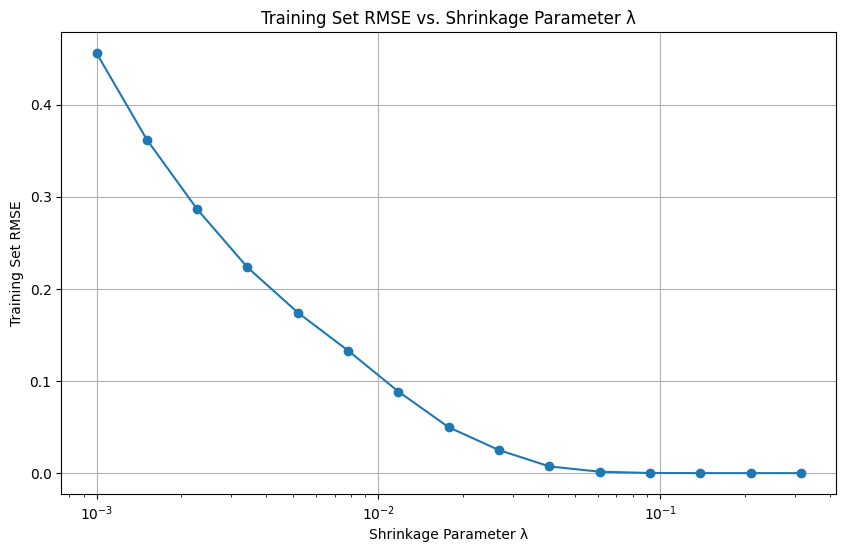

In [6]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, train_rmse, marker='o', linestyle='-')
plt.xlabel('Shrinkage Parameter λ')
plt.ylabel('Training Set RMSE')
plt.title('Training Set RMSE vs. Shrinkage Parameter λ')
plt.xscale('log')  # Using logarithmic scale for better visualization
plt.grid(True)
plt.show()

ANALYSIS:

The plot shows the training set RMSE versus the shrinkage parameter λ on a logarithmic scale for the x-axis. As expected, with higher values of λ, the RMSE decreases dramatically, suggesting that the model fits the training data more accurately with larger shrinkage parameters.

### (d) Produce a plot with different shrinkage values on the x-axis and the corresponding **test** set RMSE on the y-axis.

Same approach as before, but on the test set.

In [7]:
X_test = test.drop(['Unnamed: 0', 'Salary', 'LogSalary'], axis=1) # Features
y_test = test['LogSalary'] # Target

# transform same as before (one-hot encoding for categorical variables)
X_test_transformed = column_transformer.transform(X_test)

# List to store RMSEs for test set
test_rmse = []

# Calculate the RMSE
for lam in lambda_values: # for each lambda
    model = GradientBoostingRegressor(n_estimators=1000, learning_rate=lam, random_state=42) # for 1000 trees
    model.fit(X_train_transformed, y_train)
    y_test_pred = model.predict(X_test_transformed)
    rmse = mean_squared_error(y_test, y_test_pred, squared=False)  # square=False to get RMSE
    test_rmse.append(rmse)

test_rmse


GradientBoostingRegressor(learning_rate=0.001, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.0015085907086001776,
                          n_estimators=1000, random_state=42)

GradientBoostingRegressor(learning_rate=0.0022758459260747888,
                          n_estimators=1000, random_state=42)

GradientBoostingRegressor(learning_rate=0.0034333200182819932,
                          n_estimators=1000, random_state=42)

GradientBoostingRegressor(learning_rate=0.005179474679231213, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.007813707376518094, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.011787686347935873, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.01778279410038923, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.02682695795279726, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.040470899507597614, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.0610540229658533, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.0921055317689482, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.13894954943731375, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.20961799924531277, n_estimators=1000,
                          random_state=42)

GradientBoostingRegressor(learning_rate=0.31622776601683794, n_estimators=1000,
                          random_state=42)

[0.5082020789075778,
 0.47064203838442115,
 0.4549890333827988,
 0.45353441010961826,
 0.45629246146314223,
 0.46323246632730064,
 0.4603711172327005,
 0.4662094925930887,
 0.47008784480604254,
 0.4698832154661871,
 0.486319289450711,
 0.4771660479635506,
 0.4905961122584285,
 0.49509859463813555,
 0.49817983903108737]

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Shrinkage Parameter λ')

Text(0, 0.5, 'Test Set RMSE')

Text(0.5, 1.0, 'Test Set RMSE vs. Shrinkage Parameter λ')

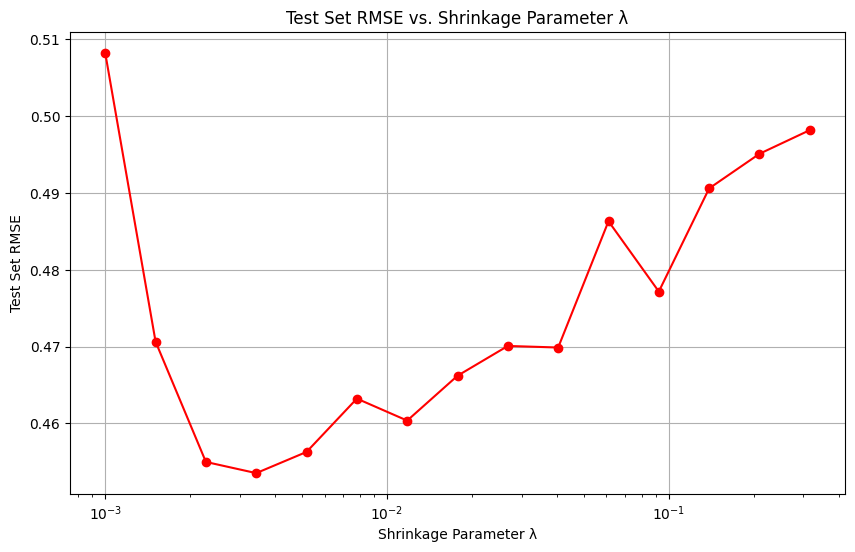

In [8]:
# Plotting the test results
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, test_rmse, marker='o', linestyle='-', color='red')
plt.xlabel('Shrinkage Parameter λ')
plt.ylabel('Test Set RMSE')
plt.title('Test Set RMSE vs. Shrinkage Parameter λ')
plt.xscale('log')  # Logarithmic scale for better visualization
plt.grid(True)
plt.show()


ANALYSIS:
This analysis shows how various λ's affect performance on unknown data. According to the plot trajectory, RMSE tends to be optimal around λ values between 10^-3 and 10^-2 and then starts so slightly increase.

Overall, the performance was generally worse than on the training data.


### (e) Compare the test RMSE of boosting to the test RMSE that results from applying two of the regression approaches seen in Chapter 3 (Linear Regression) and Chapter 6 (Linear Model Selection and Regularization)

Performance of boosting on test set with Linear Regression, and Linear Model Selection and Regularization. For the latter, I used Ridge Regression as regularization.

In [9]:
from sklearn.linear_model import LinearRegression, RidgeCV

# Initialize and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_transformed, y_train)
y_test_pred_linear = linear_model.predict(X_test_transformed)
rmse_linear = mean_squared_error(y_test, y_test_pred_linear, squared=False)

# Initialize and fit the Ridge Regression model with cross-validation to find the optimal alpha
ridge_model = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge_model.fit(X_train_transformed, y_train)
y_test_pred_ridge = ridge_model.predict(X_test_transformed)
rmse_ridge = mean_squared_error(y_test, y_test_pred_ridge, squared=False)

# Gather the best test RMSE from boosting for comparison
best_boosting_rmse = min(test_rmse)

rmse_linear, rmse_ridge, best_boosting_rmse


LinearRegression()

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))

(0.7012816392473792, 0.7078411875289173, 0.45353441010961826)

ANALYSIS:

Test RMSE results for the three models:

- Linear Regression: RMSE = 0.701
- Ridge Regression: RMSE = 0.708
- Boosting (best RMSE from earlier analysis): RMSE = 0.454

The boosting model significantly outperforms both the Linear Regression and the Ridge Regression models on the test set, indicating that it is more effective in capturing complex patterns in the data and generalizing to new observations.

### (f) Which variables appear to be the most important predictors in the boosted model?

The gradient-boosting model has a feature importance property which I used to identify the most important predictors.

Feature importance measures how much each feature contributes to the model's predictive power, with higher values indicating more significant contributions.

The features were extracted for the model with the optimal λ value (best RMSE).

In [10]:
# Fit the best boosting model
optimal_lambda = lambda_values[np.argmin(test_rmse)] # to get optimal λ
best_boosting_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=optimal_lambda, random_state=42)
best_boosting_model.fit(X_train_transformed, y_train)

# Get feature importances
feature_importances = best_boosting_model.feature_importances_

# Get feature names after one-hot encoding
feature_names = column_transformer.named_transformers_['cat'].get_feature_names_out(input_features=categorical_cols)
feature_names = np.concatenate([feature_names, X_train.drop(columns=categorical_cols).columns])

# Create a DataFrame to display feature names and their importance scores
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the top 10 most important features
importance_df.head(10)


GradientBoostingRegressor(learning_rate=0.0034333200182819932,
                          n_estimators=1000, random_state=42)

,Feature,Importance
0,CAtBat,0.555522
1,CHits,0.095784
2,CRuns,0.052935
3,AtBat,0.048994
4,Walks,0.045745
5,CRBI,0.040637
6,CWalks,0.034267
7,CHmRun,0.030649
8,Years,0.024274
9,Hits,0.023704


#### Analysis:

Top predictors (in-order):

- CAtBat (Career at-bats): Top (most influential) feature. This indicates that a player's career batting attempts are the most significant feature in predicting player salary.
- CHits (Career hits)
- CRuns (Career runs)
- AtBat
- Walks
- CRBI (Career runs batted in)
- CWalks (Career walks)
- CHmRun (Career home runs)
- Years
- Hits


CAtBat, CHits, and CRuns were the top three features identified for predicting player salary, but the CAtBat feature was the most influential.

### (g) Now apply bagging to the training set. What is the test set RMSE for this approach?

Methodology:

Use the Bagging Regressor from scikit-learn to apply bagging.

This method wraps around a base estimator with a Decision Tree Regressor implemented as the default base estimator.

In [11]:


# Initialize the Bagging Regressor
bagging_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=1000, random_state=42)

# Fit the model on the training data
bagging_model.fit(X_train_transformed, y_train)

# Predict on the test set
y_test_pred_bagging = bagging_model.predict(X_test_transformed)

# Calculate RMSE for the test set
rmse_bagging = mean_squared_error(y_test, y_test_pred_bagging, squared=False)
rmse_bagging


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=1000,
                 random_state=42)

0.477276795878066

Analysis:

The test set RMSE for 1,000 trees: 0.478.

This value indicates a relatively strong performance, comparable to some of the better results seen with the boosting models, suggesting that bagging can also effectively reduce overfitting and improve generalization on unseen data.